<a href="https://colab.research.google.com/github/bunbun205/mnist-cnn/blob/main/mnist.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

print(tf.__version__)

2.8.0


In [2]:
mnist = tf.keras.datasets.mnist
(xTrain, yTrain), (xTest, yTest) = mnist.load_data()

11501568/11490434 [==============================] - 0s 0us/step


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


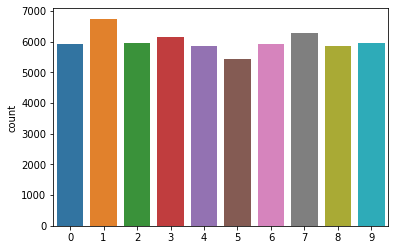

In [3]:
sns.countplot(yTrain)

In [5]:
np.isnan(xTrain).any()

False

In [6]:
np.isnan(xTest).any()

False

In [7]:
input_shape = (28, 28, 1)

xTrain = xTrain.reshape(xTrain.shape[0], xTrain.shape[1], xTrain.shape[2], 1)
xTrain = xTrain / 255.0
xTest = xTest.reshape(xTest.shape[0], xTest.shape[1], xTest.shape[2], 1)
xTest = xTest / 255.0

In [8]:
yTrain = tf.one_hot(yTrain.astype(np.int32), depth=10)
yTest = tf.one_hot(yTest.astype(np.int32), depth=10)

tf.Tensor([0. 0. 0. 0. 0. 1. 0. 0. 0. 0.], shape=(10,), dtype=float32)


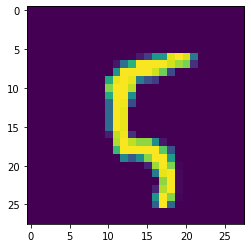

tf.Tensor([0. 0. 0. 0. 0. 1. 0. 0. 0. 0.], shape=(10,), dtype=float32)


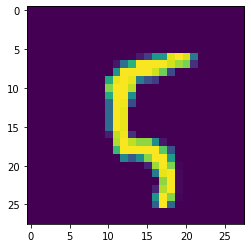

In [10]:
plt.imshow(xTrain[100][:,:,0])
print(yTrain[100])

In [12]:
batch_size = 64
num_classes = 10
epochs = 5

In [13]:
model = tf.keras.models.Sequential([tf.keras.layers.Conv2D(32, (5,5), padding='same', activation='relu', input_shape=input_shape),
                                    tf.keras.layers.Conv2D(32, (5,5), padding='same', activation='relu'),
                                    tf.keras.layers.MaxPool2D(),
                                    tf.keras.layers.Dropout(0.25),
                                    tf.keras.layers.Conv2D(64, (3,3), padding='same', activation='relu'),
                                    tf.keras.layers.Conv2D(64, (3,3), padding='same', activation='relu'),
                                    tf.keras.layers.MaxPool2D(strides=(2,2)),
                                    tf.keras.layers.Dropout(0.25),
                                    tf.keras.layers.Flatten(),
                                    tf.keras.layers.Dense(128, activation='relu'),
                                    tf.keras.layers.Dropout(0.5),
                                    tf.keras.layers.Dense(num_classes, activation='softmax')])

model.compile(optimizer=tf.keras.optimizers.RMSprop(epsilon=1e-08), loss='categorical_crossentropy', metrics=['acc'])

In [20]:
class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('acc')>0.995):
      print("\nReached 99.5% accuracy so cancelling training!")
      self.model.stop_training = True

callbacks = myCallback()

In [22]:
history = model.fit(xTrain, yTrain,
                    batch_size=batch_size,
                    epochs=epochs,
                    validation_split=0.1,
                    callbacks=[callbacks])

Epoch 1/5
844/844 [==============================] - 366s 434ms/step - loss: 0.0511 - acc: 0.9856 - val_loss: 0.0281 - val_acc: 0.9918
Epoch 2/5
844/844 [==============================] - 365s 432ms/step - loss: 0.0479 - acc: 0.9867 - val_loss: 0.0409 - val_acc: 0.9898
Epoch 3/5
844/844 [==============================] - 367s 435ms/step - loss: 0.0474 - acc: 0.9873 - val_loss: 0.0394 - val_acc: 0.9917
Epoch 4/5
844/844 [==============================] - 368s 436ms/step - loss: 0.0478 - acc: 0.9882 - val_loss: 0.0308 - val_acc: 0.9922
Epoch 5/5
844/844 [==============================] - 367s 435ms/step - loss: 0.0512 - acc: 0.9868 - val_loss: 0.0341 - val_acc: 0.9918


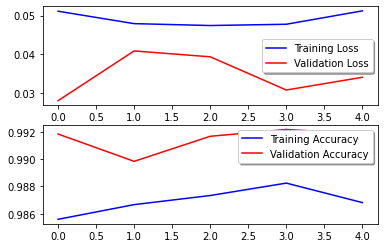

In [23]:
fig, ax = plt.subplots(2,1)
ax[0].plot(history.history['loss'], color='b', label="Training Loss")
ax[0].plot(history.history['val_loss'], color='r', label="Validation Loss", axes=ax[0])
legeng = ax[0].legend(loc='best', shadow=True)

ax[1].plot(history.history['acc'], color='b', label="Training Accuracy")
ax[1].plot(history.history['val_acc'], color='r', label="Validation Accuracy")
legeng = ax[1].legend(loc='best', shadow=True)

In [24]:
testLoss, testAcc = model.evaluate(xTest, yTest)

313/313 [==============================] - 17s 54ms/step - loss: 0.0280 - acc: 0.9924


In [30]:
YPred = model.predict(xTest)
YPredClasses = np.argmax(YPred, axis = 1)
YTrue = np.argmax(yTest, axis = 1)
confusionMtx = tf.math.confusion_matrix(YTrue, YPredClasses)

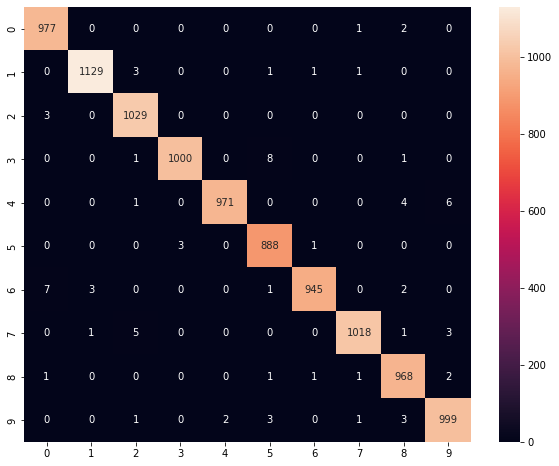

In [32]:
plt.figure(figsize=(10, 8))
sns.heatmap(confusionMtx, annot=True, fmt='g')